<a href="https://colab.research.google.com/github/curiasuncc/4105-Intro-To-ML/blob/main/Hw3P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.datasets import load_breast_cancer  

from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

breast = load_breast_cancer() 

In [20]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.datasets import load_breast_cancer  

In [21]:
breast = load_breast_cancer() 

breast_data = breast.data 
breast_data.shape

(569, 30)

In [22]:
breast_input = pd.DataFrame(breast_data)
breast_input.head() 

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
breast_labels = breast.target
breast_labels.shape

(569,)

In [24]:

labels = np.reshape(breast_labels,(569,1)) 

final_breast_data = np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape 

(569, 31)

In [25]:
breast_dataset = pd.DataFrame(final_breast_data)

features = breast.feature_names 
features 

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [26]:
features_labels = np.append(features,'label') 
breast_dataset.columns = features_labels 
breast_dataset.head() 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [27]:
breast_dataset['label'].replace(0, 'Benign',inplace=True) 
breast_dataset['label'].replace(1, 'Malignant',inplace=True) 

#breast_dataset.tail()

In [ ]:
#dataset = pd.read_csv('/content/diabetes.csv') 
#dataset.head(20) 

In [28]:

X = breast_dataset.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]].values #all variables in dataset
Y = breast_dataset.iloc[:, 30].values   #outcome values 


In [29]:

X[0:10]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [30]:
#Now we’ll split our Data set into Training Data and Test Data.20% test 80% train
#Logistic model and Test data will be used to validate our model. We’ll use Sklearn to 
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0) 

In [31]:
#Now we’ll do feature scaling to scale our data between 0 and 1 to get better accuracy.
#Here Scaling is important because there is a huge difference between Age and Estimated
 
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test) 

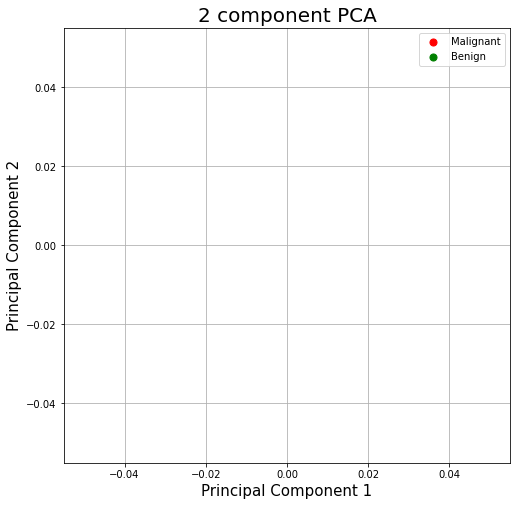

In [12]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2) 
principalComponents = pca.fit_transform(X_train) 
principalDf = pd.DataFrame(data = principalComponents 
             , columns = ['principal component 1', 'principal component 2']) 
finalDf = pd.concat([principalDf, breast_dataset[['label']]], axis = 1) 

fig = plt.figure(figsize = (8,8)) 
ax = fig.add_subplot(1,1,1)  
ax.set_xlabel('Principal Component 1', fontsize = 15) 
ax.set_ylabel('Principal Component 2', fontsize = 15) 
ax.set_title('2 component PCA', fontsize = 20) 
targets = ['Malignant', 'Benign'] 
colors = ['r', 'g'] 
for target, color in zip(targets,colors): 
    indicesToKeep = finalDf['label'] == target 
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'] 
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color 
               , s = 50) 
ax.legend(targets) 
ax.grid()

In [35]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
#fit a naive base model on the data
model= GaussianNB()
model.fit(X_train,Y_train)
#make predictions
expected=Y_train
predicted= model.predict(X_train)
#summarize the fit of the model
print(metrics.classification_report(expected,predicted))
print(metrics.confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

      Benign       0.95      0.90      0.92       165
   Malignant       0.94      0.98      0.96       290

    accuracy                           0.95       455
   macro avg       0.95      0.94      0.94       455
weighted avg       0.95      0.95      0.95       455

[[148  17]
 [  7 283]]
